In [1]:
# 1. Perceptron
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [2]:
# Instantiate Perceptron
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.9090909090909091


/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters ha

Text(0.5, 1.0, 'Imapvt of Training')

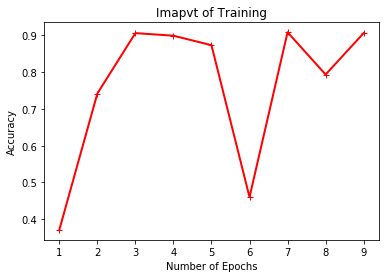

In [3]:
# Visualize impact of the number of training epochs on the prediction accuracy
import matplotlib.pyplot as plt

%matplotlib inline

startNumEpochs = 1
finishNumEpochs = 10
incrementAmt = 1
predScores = []
numEpochs = []
for epochCount in range(startNumEpochs, finishNumEpochs, incrementAmt):
    clf = Perceptron(random_state=0, max_iter=epochCount)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    numEpochs.append(epochCount)
    predScores.append(score)
    
plt.plot(numEpochs, predScores, "r-+", linewidth=2)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Imapvt of Training")
    

In [4]:
# Lab assignment 4 foundation
# - Working with the VizWiz dataset

import os
import json
from pprint import pprint
import requests

base_url = 'https://ivc.ischool.utexas.edu/VizWiz/data'
img_dir = '%s/Images/' %base_url
print(img_dir)

https://ivc.ischool.utexas.edu/VizWiz/data/Images/


In [5]:
# Retrieve file from URL and store it locally
split = 'train'
trainFile = '%s/Annotations/%s.json' %(base_url, split)
trainData = requests.get(trainFile, allow_redirects=True)
print(trainFile)

https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/train.json


In [6]:
# Read the local file
numTrainVQs = 4
trainingData = trainData.json()
for vq in trainingData[0:numTrainVQs]:
    image_name = vq['image']
    question = vq['question']
    label = vq['answerable']
    print(image_name)
    print(question)
    print(label)

VizWiz_train_000000000000.jpg
What's the name of this product?
1
VizWiz_train_000000000001.jpg
Can you tell me what is in this can please?
1
VizWiz_train_000000000002.jpg
Is this enchilada sauce or is this tomatoes?  Thank you.
1
VizWiz_train_000000000003.jpg
What is the captcha on this screenshot?
1


In [7]:
split = 'val'
valFile = '%s/Annotations/%s.json' %(base_url, split)
valData = requests.get(valFile, allow_redirects=True)
print(valFile)

https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/val.json


In [8]:
numValVQs = 3
validationData = valData.json()
for vq in validationData[:numValVQs]:
    image_name = vq['image']
    question = vq['question']
    label = vq['answerable']
    print(image_name)
    print(question)
    print(label)

VizWiz_val_000000028000.jpg
What's this?
0
VizWiz_val_000000028001.jpg
What is this?
0
VizWiz_val_000000028002.jpg
What is this?
1


https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_val_000000028000.jpg


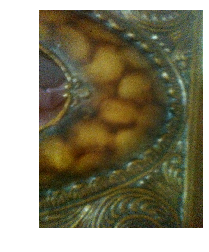

https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_val_000000028001.jpg


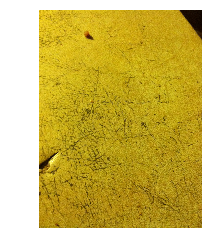

In [9]:
from skimage import io
import matplotlib.pyplot as plt

# read image from URL
def visualize_image(image_url):
    image = io.imread(image_url)
    print(image_url)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
num_vqs = 2
for vq in validationData[:num_vqs]:
    image_name = vq['image']
    image_url = img_dir + image_name
    visualize_image(image_url)

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yizhuoli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
# Extract features to describe the questions
import nltk

def extract_language_features(question):
    print(question)
    question = question.lower()
    print(question)
    
    words = question.split()
    num_unique_words = len(set(words))
    num_words = len(words)
    
    partsOfSpeechTag = nltk.pos_tag(words)
    
#     tokenized_question = nltk.word_tokenize(question)
#     num_words = len()
    
    featureVector = [num_unique_words, num_words]
    
    return featureVector

numVQs = 5
for vq in trainingData[:numVQs]:
    # question features
    question = vq['question']
    
    questionFeature = extract_language_features(question)
    print(questionFeature)
    
    # Placeholder
    image_name = vq['image']
    image_url = img_dir + image_name
    print(image_url)

What's the name of this product?
what's the name of this product?
[6, 6]
https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_train_000000000000.jpg
Can you tell me what is in this can please?
can you tell me what is in this can please?
[9, 10]
https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_train_000000000001.jpg
Is this enchilada sauce or is this tomatoes?  Thank you.
is this enchilada sauce or is this tomatoes?  thank you.
[8, 10]
https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_train_000000000002.jpg
What is the captcha on this screenshot?
what is the captcha on this screenshot?
[7, 7]
https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_train_000000000003.jpg
What is this item?
what is this item?
[4, 4]
https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_train_000000000004.jpg
